In [ ]:
# Description: this program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the
#              the closing stock price of a corporation using the past 60 days stock price

## importing the necessary libraries



In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Downloading the stock data using the open-source python library yfinance

In [2]:

import yfinance as yf

In [14]:
import datetime as dt
startDate = dt.date(1960, 1, 1)
endDate = dt.date(2022, 1, 1)

In [34]:
rawStockData = yf.download('AMZN', start=startDate, end=endDate)


[*********************100%***********************]  1 of 1 completed


In [35]:
rawStockData

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...
2021-12-27,171.037003,172.942993,169.215500,169.669495,169.669495,58688000
2021-12-28,170.182495,172.175995,169.135498,170.660995,170.660995,54638000
2021-12-29,170.839996,171.212006,168.600494,169.201004,169.201004,35754000


In [20]:
rawStockData['Date'] =rawStockData['Date'].dt.normalize()

KeyError: 'Date'

In [ ]:
stockdata.shape

(6402, 6)

## **Visualizing the data (closing price)**

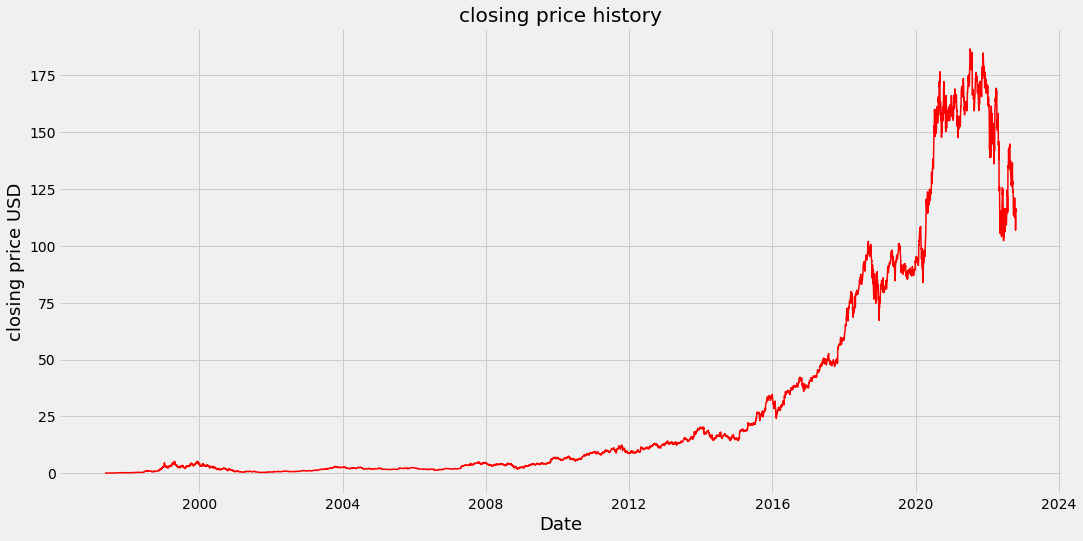

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('closing price history')
plt.plot(stockdata['Close'], linewidth=1.5, color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('closing price USD', fontsize=18)
plt.show()

## storing the data in a csv file

In [ ]:
stockdata.to_csv('stockdata.csv')

## creating a separate dataframe from this csv to perform further operations

In [ ]:
df = pd.read_csv('stockdata.csv')

In [ ]:
# permanently setting the date as the index and eliminating all the nulls (if any)
# Note: this is only supposed to be executed once
df.set_index("Date", inplace=True)
df.dropna(inplace=True)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...
2022-10-14 00:00:00-04:00,114.099998,114.959999,106.599998,106.900002,106.900002,67651200
2022-10-17 00:00:00-04:00,110.110001,114.190002,110.089996,113.790001,113.790001,62782000
2022-10-18 00:00:00-04:00,119.059998,119.519997,114.790001,116.360001,116.360001,65607400


In [ ]:
# creating a dataframe only with the 'Close' column and then converting it to a NumPy array
data = df.filter(['Close'])
dataset = data.values

In [ ]:
dataset

array([[9.79169980e-02],
       [8.64579976e-02],
       [8.54170024e-02],
       ...,
       [1.16360001e+02],
       [1.15070000e+02],
       [1.15250000e+02]])

In [ ]:
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

5122

In [ ]:
# scaling the closing data b/w 0 and 1 (inclusive)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
scaled_data

array([[1.50803697e-04],
       [8.93615670e-05],
       [8.37798448e-05],
       ...,
       [6.23537640e-01],
       [6.16620771e-01],
       [6.17585917e-01]])

In [ ]:
# creating the scaled training dataset
train_data = scaled_data[0:training_data_len, :]


# splitting the data
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

In [ ]:
# converting the x_train and y_train to NumPy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# reshape the x_train to make it three-dimensional because LSTM expects it
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_train.shape

(5062, 60, 1)

In [ ]:
# building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

## Compiling the model

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
159/159 [==============================] - 20s 98ms/step - loss: 1.4786e-04
Epoch 2/20
159/159 [==============================] - 18s 115ms/step - loss: 1.0409e-05
Epoch 3/20
159/159 [==============================] - 9s 59ms/step - loss: 9.4006e-06
Epoch 4/20
159/159 [==============================] - 9s 59ms/step - loss: 9.7837e-06
Epoch 5/20
159/159 [==============================] - 9s 59ms/step - loss: 9.2552e-06
Epoch 6/20
159/159 [==============================] - 9s 59ms/step - loss: 8.8489e-06
Epoch 7/20
159/159 [==============================] - 10s 60ms/step - loss: 8.4964e-06
Epoch 8/20
159/159 [==============================] - 10s 60ms/step - loss: 8.8081e-06
Epoch 9/20
159/159 [==============================] - 10s 60ms/step - loss: 7.8803e-06
Epoch 10/20
159/159 [==============================] - 9s 59ms/step - loss: 8.2938e-06
Epoch 11/20
159/159 [==============================] - 11s 71ms/step - loss: 7.8164e-06
Epoch 12/20
159/159 [========================

In [ ]:
# creating the testing dataset
# creating a new array containing scaled values from index 5122 to 6402
test_data = scaled_data[training_data_len - 60: , :]

# create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
# convert the data to a NumPy array so that we can use it the LSTM model
x_test = np.array(x_test)

In [ ]:
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# getting the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) # here we are 'unscaling' the values to the original scale


40/40 [==============================] - 2s 17ms/step


In [ ]:
predictions

array([[ 48.986187],
       [ 48.755524],
       [ 48.454597],
       ...,
       [110.87256 ],
       [111.765976],
       [112.69948 ]], dtype=float32)

In [ ]:
# getting the root mean squared error (RMSE) for the accuracy
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.3267452716827393

In [ ]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
valid

,Close,Predictions
Date,,
2017-09-21 00:00:00-04:00,48.232498,48.986187
2017-09-22 00:00:00-04:00,47.755001,48.755524
2017-09-25 00:00:00-04:00,46.989498,48.454597
2017-09-26 00:00:00-04:00,46.930000,48.026382
2017-09-27 00:00:00-04:00,47.543499,47.621929
...,...,...
2022-10-14 00:00:00-04:00,106.900002,113.096451
2022-10-17 00:00:00-04:00,113.790001,111.201180
2022-10-18 00:00:00-04:00,116.360001,110.872559


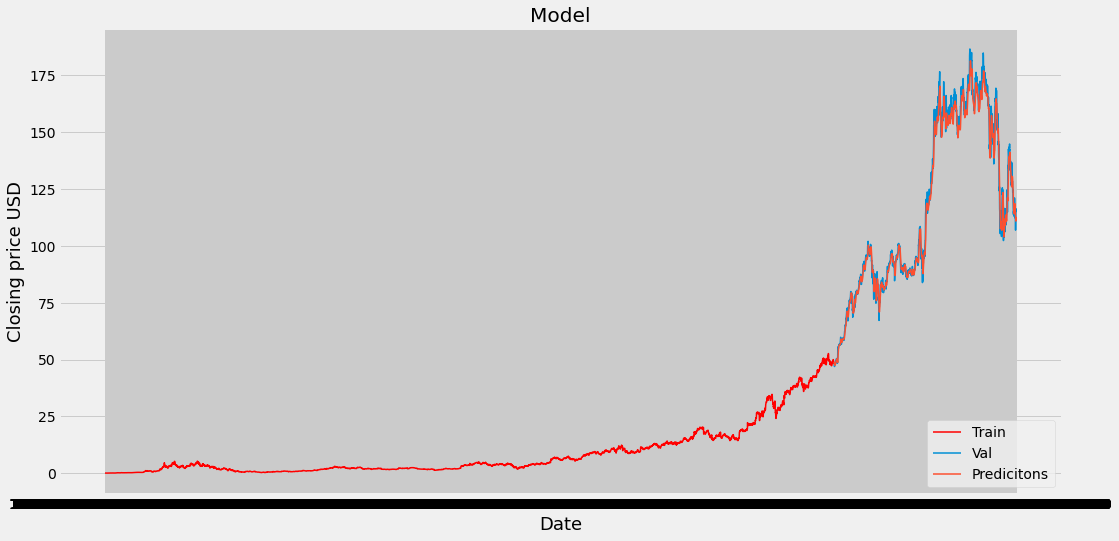

In [ ]:
# visualizing the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing price USD', fontsize=18)
plt.plot(train['Close'], linewidth=1.5, color='red')
plt.plot(valid[['Close', 'Predictions']], linewidth=1.5)
# plt.plot(valid['Close'],linewidth=1.5, color='red')
# plt.plot(valid['Predictions'], linewidth=1.5, color='green')
plt.legend(['Train', 'Val', 'Predicitons'], loc='lower right')
plt.show()